### **NumPy, Pandas, Matplotlib & Seaborn**

# **Numpy**

NumPy is the fundamental package for numerical computing in Python. It provides the ndarray — a fast, memory-efficient multi-dimensional array — and vectorized operations (apply operations to whole arrays without Python loops).

Why use NumPy?

Much faster and more memory-efficient than Python lists for numeric data.

Vectorized math (no for loops).

Basis for many scientific libraries (Pandas, SciPy, scikit-learn, etc.).

In [1]:
#1.Create Arrays
import numpy as np

# create arrays
a = np.array([1, 2, 3])           # 1D
b = np.array([[1,2,3],[4,5,6]])   # 2D (matrix)

print(a.shape, a.dtype)  # (3,) int64
print(b.shape)           # (2, 3)


(3,) int64
(2, 3)


In [2]:
#2.Basic array operations — Beginner
x = np.array([1,2,3])
y = np.array([10,20,30])

print(x + y)      # [11 22 33]
print(x * 2)      # [2 4 6]
print(x * y)      # elementwise multiplication [10 40 90]



[11 22 33]
[2 4 6]
[10 40 90]


In [3]:

#3.Indexing and Slicing — Beginner → Intermediate
M = np.arange(12).reshape(3,4)  # 3x4 matrix: 0..11
# M =
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

# simple indexing
print(M[1,2])       # row 1, col 2 -> 6

# row slice (copy view behaviour: slices are views)
row1 = M[1, :]      # second row
col2 = M[:, 2]      # third column

# boolean indexing
mask = M % 2 == 0
evens = M[mask]     # all even entries as 1D array

6


Broadcasting lets NumPy perform arithmetic between differently shaped arrays by virtually expanding smaller arrays.


In [4]:

A = np.array([[1,2,3],
              [4,5,6]])   # shape (2,3)
v = np.array([10, 20, 30])  # shape (3,)

# Adds v to each row of A
B = A + v   # shape (2,3)  -> [[11,22,33], [14,25,36]]

In [5]:
#Intermediate broadcasting example (column vector)

col = np.array([[1],[2]])   # shape (2,1)
row = np.array([10,20,30])  # shape (3,)
print(col + row)            # result shape (2,3)

[[11 21 31]
 [12 22 32]]


## **Pandas**

What is Pandas?

Pandas is a library that builds on NumPy to provide flexible, labeled data structures:

Series: 1D labeled array (like column)

DataFrame: 2D labeled table (rows + columns), ideal for tabular data (CSV, Excel, SQL).

Why use Pandas?

Easy I/O (CSV, Excel, SQL).

Powerful data cleaning, grouping, aggregation, pivoting.

Works well with plotting and stats libraries.

Series has an index (labels). DataFrame is like a table; columns can be different dtypes.


In [6]:
#Pandas Series and DataFrame
import pandas as pd

# Series
s = pd.Series([10, 20, 30], index=['a','b','c'])
print(s['b'])  # 20

# DataFrame from dict
df = pd.DataFrame({
    'name': ['Alice','Bob','Carol'],
    'age': [25, 30, 22],
    'score': [88, 92, 79]
})
df




20


,name,age,score
0,Alice,25,88
1,Bob,30,92
2,Carol,22,79


In [8]:


# Pandas Series and DataFrame
import pandas as pd

# -----------------------------
# 1. Series
# -----------------------------
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print("Series element:", s['b'])  # 20


# -----------------------------
# 2. Create a DataFrame
# -----------------------------
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol'],
    'age': [25, 30, 22],
    'score': [88, 92, 79]
})
print("\nOriginal DataFrame:")
print(df)


# -----------------------------
# 3. Export DataFrame to CSV
# (This creates data.csv)
# -----------------------------
df.to_csv('data.csv', index=False)
print("\ndata.csv created successfully!")


# -----------------------------
# 4. Import CSV (Read it back)
# -----------------------------
df_loaded = pd.read_csv('data.csv')
print("\nLoaded DataFrame:")
print(df_loaded)


# -----------------------------
# 5. Quick Exploration
# -----------------------------
print("\nHead:")
print(df_loaded.head())

print("\nInfo:")
print(df_loaded.info())

print("\nDescribe:")
print(df_loaded.describe())


# -----------------------------
# 6. Export to another CSV
# -----------------------------
df_loaded.to_csv('out.csv', index=False)
print("\nout.csv created successfully!")


Series element: 20

Original DataFrame:
    name  age  score
0  Alice   25     88
1    Bob   30     92
2  Carol   22     79

data.csv created successfully!

Loaded DataFrame:
    name  age  score
0  Alice   25     88
1    Bob   30     92
2  Carol   22     79

Head:
    name  age  score
0  Alice   25     88
1    Bob   30     92
2  Carol   22     79

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   score   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None

Describe:
             age      score
count   3.000000   3.000000
mean   25.666667  86.333333
std     4.041452   6.658328
min    22.000000  79.000000
25%    23.500000  83.500000
50%    25.000000  88.000000
75%    27.500000  90.000000
max    30.000000  92.000000

out.csv created successfully!


Data Cleaning Basics — Beginner → Intermediate

Common tasks: missing values, type conversions, duplicates.



In [10]:
# sample dataframe with issues
df = pd.DataFrame({
    'name': ['A','B','C','D', None],
    'age': ['23','35', None, '40', '27'],
    'score': [88, 92, 85, None, 90]
})

# 1. convert types (age -> numeric)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 2. missing values
df['age'].fillna(df['age'].median(), inplace=True)   # impute median
df['score'].fillna(df['score'].mean(), inplace=True)

# 3. drop rows where 'name' is missing
df = df.dropna(subset=['name'])

# 4. remove duplicates
df = df.drop_duplicates()


/tmp/ipython-input-1042278097.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)   # impute median
/tmp/ipython-input-1042278097.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Data Filtering and Transformation — Beginner → Intermediate

In [11]:

# filtering
high_score = df[df['score'] > 90]

# column transform (new column)
df['age_cat'] = pd.cut(df['age'], bins=[0,25,35,100], labels=['young','mid','senior'])

# apply function row/column-wise
df['score_scaled'] = (df['score'] - df['score'].mean()) / df['score'].std()

# groupby & aggregate
agg = df.groupby('age_cat').agg({
    'score': ['mean', 'count'],
    'age': 'median'
})
# flatten MultiIndex columns
agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
agg.reset_index()

/tmp/ipython-input-2560000959.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby('age_cat').agg({


,age_cat,score_mean,score_count,age_median
0,young,88.00,1,23.0
1,mid,88.50,2,33.0
2,senior,88.75,1,40.0


***Benefits of Pandas (concise)***

Intuitive syntax for tabular operations.

Powerful groupby/pivot table operations.

Easy time-series support (datetime index).

Seamless integration with plotting & ML libraries.

Data Visualization & Matplotlib

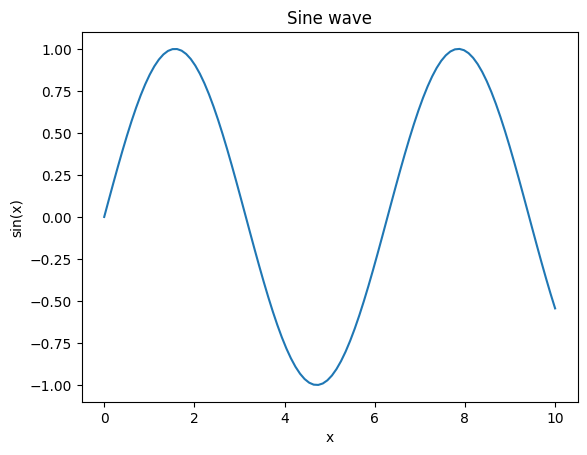

In [12]:
#Create Line Plot using Matplotlib — Beginner
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

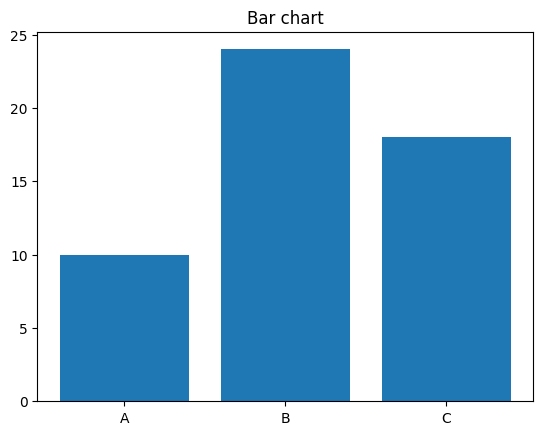

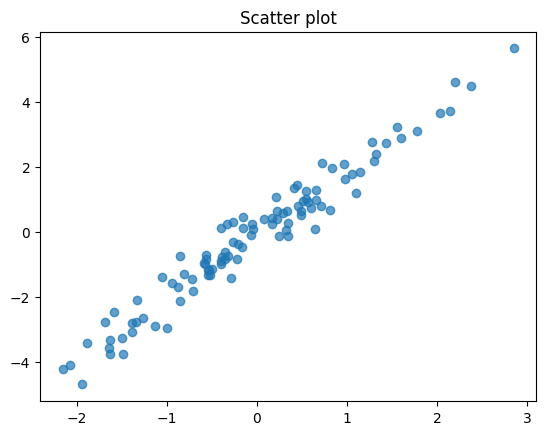

In [13]:
#Bar and Scatter Plots — Beginner
# Bar plot
categories = ['A','B','C']
values = [10, 24, 18]
plt.bar(categories, values)
plt.title("Bar chart")
plt.show()

# Scatter plot
x = np.random.randn(100)
y = x*2 + np.random.randn(100)*0.5
plt.scatter(x, y, alpha=0.7)
plt.title("Scatter plot")
plt.show()

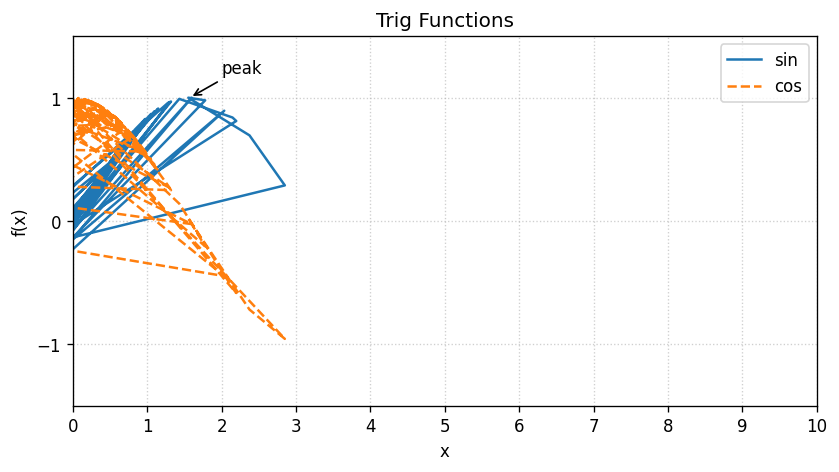

In [14]:
#Key Plot Customizations — Intermediate
plt.figure(figsize=(8,4), dpi=120)          # size & resolution
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos', linestyle='--')
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.xticks(np.arange(0,11,1))               # custom ticks
plt.yticks([-1, 0, 1])
plt.legend(loc='upper right')               # legend
plt.grid(True, linestyle=':', alpha=0.6)    # gridlines
plt.title("Trig Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.annotate("peak", xy=(np.pi/2,1), xytext=(2,1.2),
             arrowprops=dict(arrowstyle="->"))
plt.show()

**Note:**

Plot Titles, Axis Labels, Legends, Gridlines

plt.title(), plt.xlabel(), plt.ylabel() add labels.

plt.legend() shows labelled plot elements (need label= in plot).

plt.grid() toggles gridlines.

plt.tight_layout() avoids overlapping labels.

Save figure: plt.savefig('figure.png', dpi=200, bbox_inches='tight').

# **Seaborn**

In [ ]:
Seaborn is a statistical graphics library built on Matplotlib. It provides higher-level plotting functions and nice default styles for exploring data (especially DataFrame inputs).

Why use Seaborn? Easier to build attractive statistical plots (distribution, categorical, relational), integrates with Pandas, provides themes and color palettes.

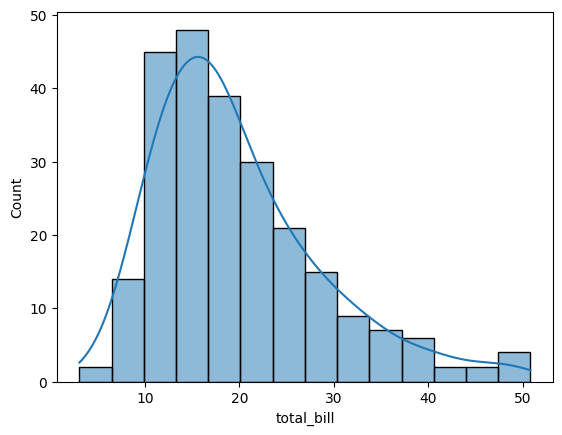

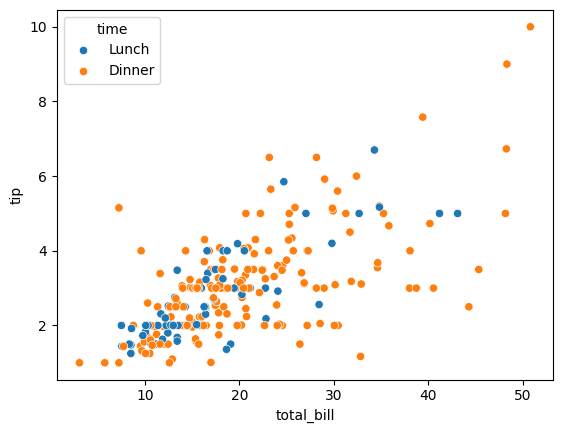

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# load sample dataset
tips = sns.load_dataset('tips')
sns.histplot(tips['total_bill'], kde=True)   # distribution
plt.show()

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')   # relational, with hue
plt.show()


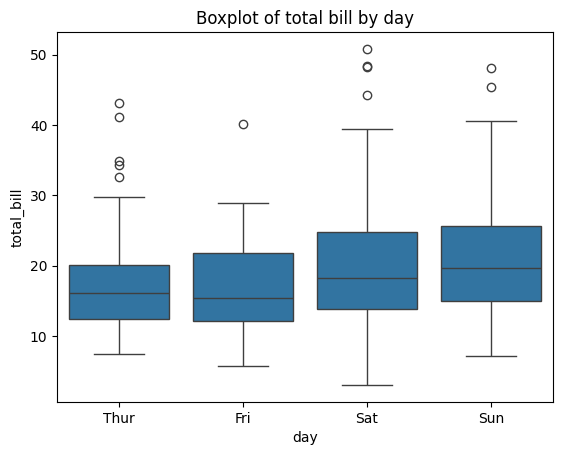

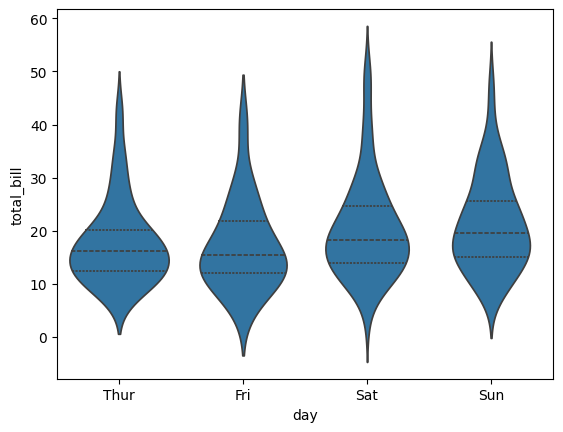

/tmp/ipython-input-784223412.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='bar', ci='sd')


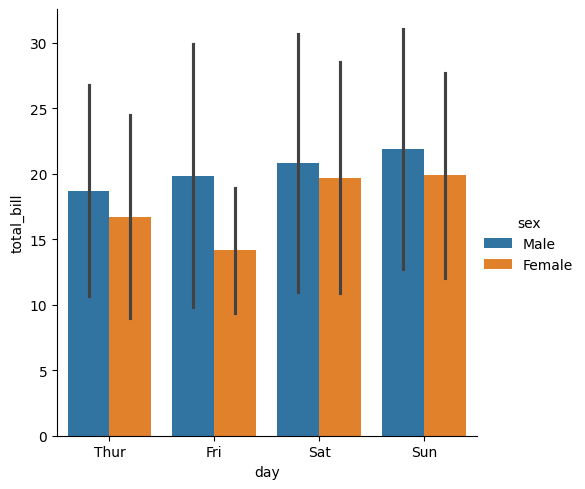

In [16]:
#Statistical Plots with Seaborn
#Boxplot, Violin, Catplot
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title("Boxplot of total bill by day")
plt.show()

sns.violinplot(data=tips, x='day', y='total_bill', inner='quartile')
plt.show()

# categorical multi-plot
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='bar', ci='sd')
plt.show()

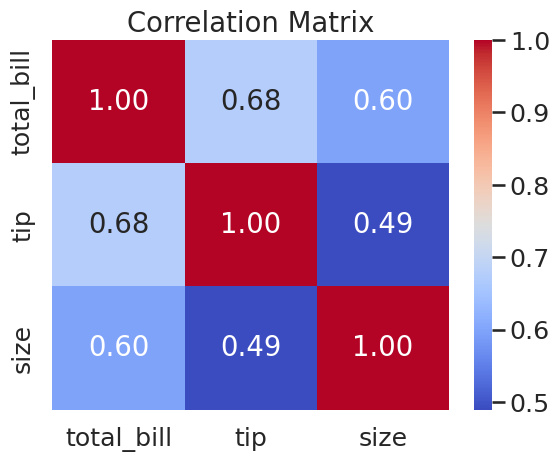

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Select only numeric columns
numeric_df = tips.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# heatmap is great for visualizing correlation or pivot tables.



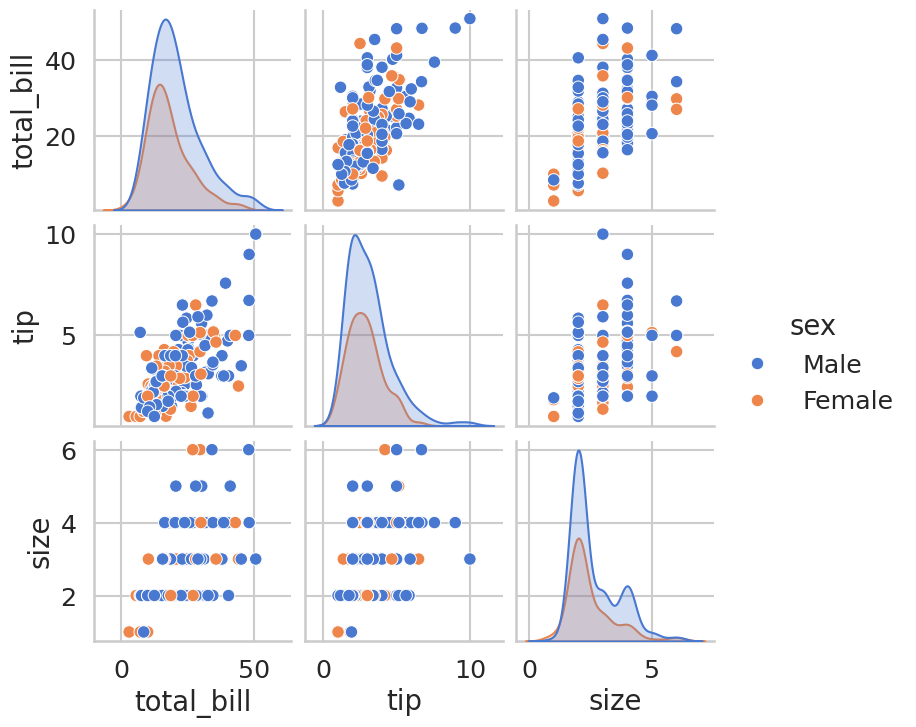

In [20]:
#Pairplot (Pairwise Relationships)
sns.pairplot(tips[['total_bill','tip','size','sex']], hue='sex', diag_kind='kde')
plt.show()


#Step-by-step: pairplot shows pairwise scatterplots + marginal distributions; hue colors by category.



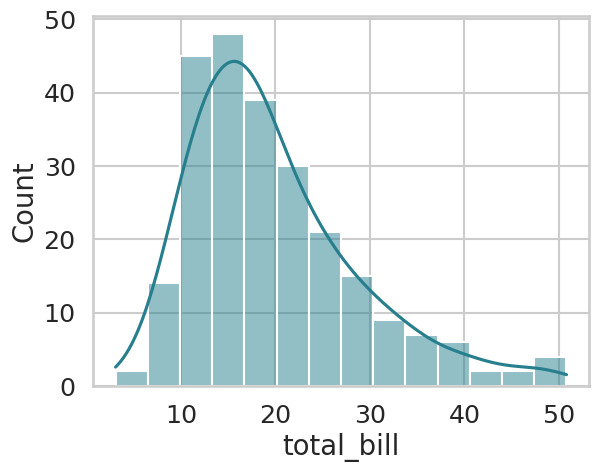

In [18]:
#eaborn Styling and Customization
sns.set_theme(style="whitegrid", palette="muted")  # global theme
sns.set_context("talk", font_scale=1.1)            # change scale for presentations

# custom palette
pal = sns.color_palette("viridis", as_cmap=False)

sns.histplot(tips['total_bill'], color=pal[2], kde=True)
plt.show()

# Combined Example: From CSV → Clean → Visualize

(3, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   score   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None


,name,age,score
0,Alice,25,88
1,Bob,30,92
2,Carol,22,79


             age      score
count   3.000000   3.000000
mean   25.666667  86.333333
std     4.041452   6.658328
min    22.000000  79.000000
25%    23.500000  83.500000
50%    25.000000  88.000000
75%    27.500000  90.000000
max    30.000000  92.000000


/tmp/ipython-input-1082555058.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)


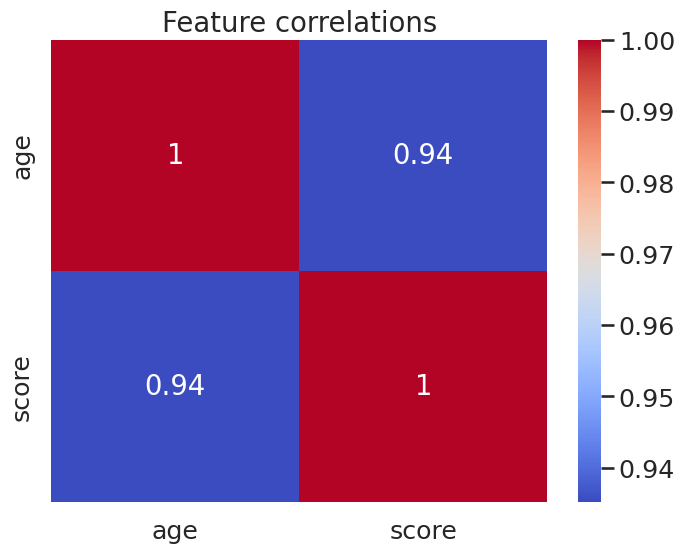

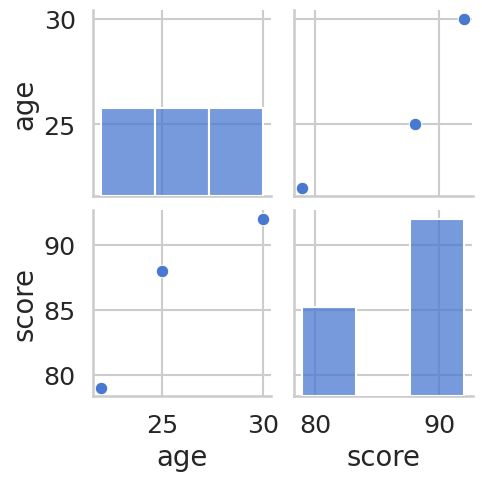

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('data.csv')   # assume a file with numeric + categorical columns

# 2. Quick inspect
print(df.shape)
print(df.info())
display(df.head())

# 3. Clean: parse dates, convert types
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 4. handle missing numeric values by median
num_cols = df.select_dtypes(include='number').columns
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)

# 5. feature: total spend (example)
if {'price','quantity'}.issubset(df.columns):
    df['total'] = df['price'] * df['quantity']

# 6. summary stats & correlation
print(df[num_cols].describe())
corr = df[num_cols].corr()

# 7. visualize correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature correlations")
plt.show()

# 8. scatter with regression (seaborn)
if 'total' in df.columns and 'rating' in df.columns:
    sns.regplot(data=df, x='total', y='rating')
    plt.title("Rating vs Total (with regression)")
    plt.show()

# 9. pairplot on selected numeric cols
sns.pairplot(df[num_cols.tolist()[:4]])  # first 4 numeric columns
plt.show()
